In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, recall_score,f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df= pd.read_csv(r"D:\iiitnr\Day11\student_dataset.csv")
df.head()

,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9


In [42]:
def get_result(x):
    if x >= 40:
        return 'Pass'
    else:
        return 'Fail'

df['Result'] = df['Final_Score'].apply(get_result)


In [43]:
df['Result'] = df['Result'].map({'Pass': 1, 'Fail': 0})


In [44]:
X = df[['Hours_Studied', 'Attendance_Rate', 'Previous_Sem_CGPA']]
y = df['Result']

In [45]:
X.head()
print("\n")
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

In [46]:
X.head()


,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA
0,3.6,55.1,7.58
1,6.2,83.2,6.61
2,2.2,50.3,8.98
3,1.1,58.0,6.35
4,2.7,77.4,7.19


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

In [48]:
df['Result'] = df['Result'].map({'Pass': 1, 'Fail': 0})

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Predicting  and evaluating the model

In [51]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Plot confusion matrix

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9


In [53]:
print("Precision", precision_score(y_test, y_pred))

Precision 0.9


In [54]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 1.0


In [55]:
from sklearn.metrics import f1_score

In [56]:
print("F1 Score:",f1_score(y_test, y_pred))

F1 Score: 0.9473684210526315


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

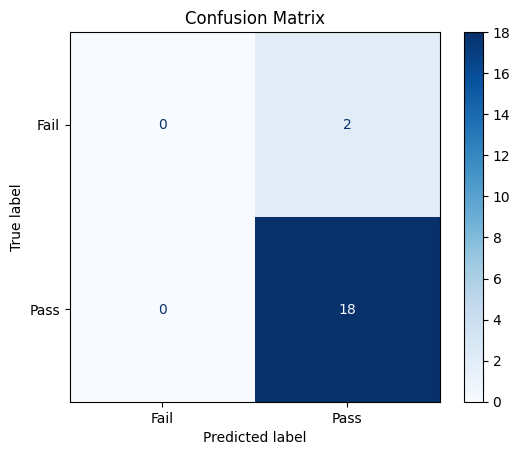

In [58]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Task 2

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [76]:
df= pd.read_csv(r"D:\iiitnr\Day11\student_dataset.csv")
df.head()

,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9


In [77]:
df['Part_Time_Job'] = df['Part_Time_Job'].map({'Yes': 1, 'No': 0})

In [78]:
def assign_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 50:
        return 'C'
    else:
        return 'D'
df['Grade'] = df['Final_Score'].apply(assign_grade)   

In [79]:
from sklearn.preprocessing import LabelEncoder


In [80]:
label_encoder = LabelEncoder()
df['Grade_Label'] = label_encoder.fit_transform(df['Grade'])

In [81]:
X = df[['Age', 'Hours_Studied', 'Attendance_Rate', 'Previous_Sem_CGPA', 'Part_Time_Job']]
y = df['Grade_Label']


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)




In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [86]:
y_pred = model.predict(X_test)

In [87]:
y_pred

array([2, 3, 2, 2, 3, 2, 2, 3, 0, 0, 2, 3, 0, 3, 2, 2, 3, 3, 3, 3])

In [88]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, recall_score,f1_score

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.2

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.00      0.00      0.00         3
           2       0.12      0.14      0.13         7
           3       0.22      0.40      0.29         5

    accuracy                           0.20        20
   macro avg       0.17      0.19      0.17        20
weighted avg       0.18      0.20      0.18        20



c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

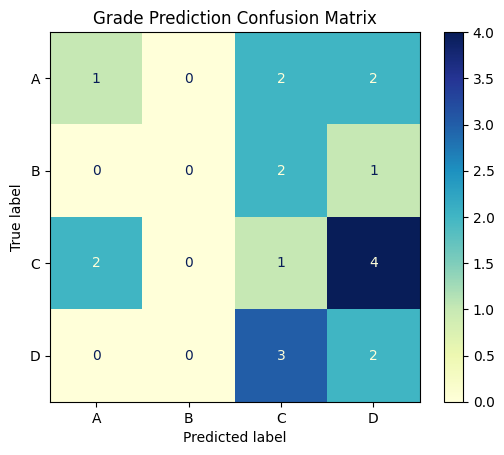

In [74]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='YlGnBu')
plt.title("Grade Prediction Confusion Matrix")
plt.show()